# L05: Least squares and linear regression

**Sources and additional reading:**

- Lupton, chapters 10.3, 11
- Outlier plot: https://www.nature.com/articles/s41592-019-0369-z
- Ivezić, chapters 8.9, 8.11

## Example: Fitting straight line to data

Let us assume that we have a set of independent variables $(x_1, ..., x_n)$, as well as a corresponding set of observations $(y_1, ..., y_n)$. Each $y_i$ is drawn from a Gaussian distribution centered on $y_{t, i}$ with standard deviation $\sigma_i$ (see figure below). In addition, we have a model that predicts $$y_{i, t} = f(x_i, \theta) = \theta_0+\theta_1x_i.$$ Our aim is to estimate the values of $\theta_0, \theta_1$.

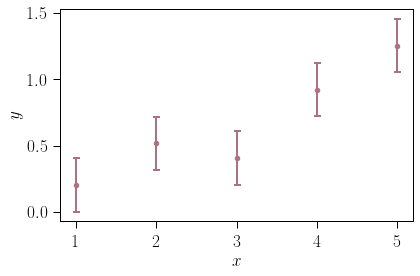

Given what we discussed last week, our method of choice is MLE, and we can write down the log-likelihood for this problem as $$\log P(y_1, ..., y_n|x_1, ..., x_n, \theta) = -\frac{n}{2}\log{2\pi}-\sum_i\log{\sigma_i}-\sum_i \frac{(y_i-f(x_i, \theta))^2}{2\sigma_i^2}.$$ As the variances are known, maximizing this likelihood is equivalent to minimizing the so-called $\chi^2$ quantity, defined as $$\chi^2 := -2\log P(y_1, ..., y_n|x_1, ..., x_n, \theta) = \sum_i \frac{(y_i-f(x_i, \theta))^2}{\sigma_i^2},$$ where we have ignored constants that do not depend on the parameters $\theta$. 

If the errors in all observations $y_i$ are equal (homescedastic), i.e. $\sigma_i=\sigma$ for all $i$, this simplifies to minimizing $$\chi^2 = \sum_i (y_i-f(x_i, \theta))^2.$$ This is nothing else than the sum of the squared deviations between the data and the model. Starting with MLE, we have rediscovered the method of *ordinary least squares* to estimate model parameters from data. For Gaussian data, the least squares (LS) estimator is equivalent to the MLE, while for non-Gaussian data these two will geneally differ, but the LS estimator can still be used. 

Let us now see this method in action for the problem of fitting a straight line to data as described above: To simplify calulcations, we make the additional assumption that all errors are equal, i.e. $\sigma_i=\sigma$ for all $i$. Then we can write the $\chi^2$ quantity to be minimized as $$\chi^2 = \sum_i (y_i- \theta_0-x_i\theta_1)^2.$$ We can thus estimate $\hat{\theta}_0$ and $\hat{\theta}_1$ through $$\frac{\partial \chi^2}{\partial \hat{\theta}_0} \overset{!}{=} 0,$$ $$\frac{\partial \chi^2}{\partial \hat{\theta}_1} \overset{!}{=} 0.$$ Inserting and expanding out then gives $$\hat{\theta}_1=\frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2},$$ $$\hat{\theta}_0=\bar{y}-\hat{\theta}_1\bar{x},$$ where $\bar{x}=\frac{1}{n}\sum_i x_i$ and $\bar{y}=\frac{1}{n}\sum_i y_i$.

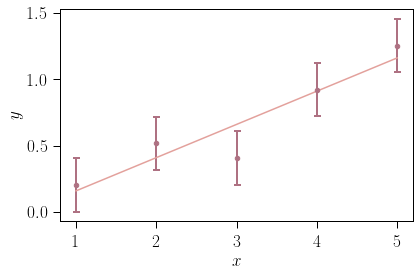

## Generalized least squares 

Let us now generalize our discussion in several ways: First, we will drop the assumption of homoscedasticity. Secondly so far we have assumed univariate $x$, but we can equally apply the methodology introduced above to multivariate variables. 

Let us assume that $\boldsymbol{x}$ is a multivariate vector of length $k$, and $y$ is the corresponding measurement. Our model predicts that the scalar $y_i$ depend on $\boldsymbol{x}$ through $$y_{i, t} = \theta_0 + \theta_1 x_{i1} + \cdots \theta_k x_{ik}.$$ Let us further assume that we would like to fit $n$ pairs $(y_i, x_{i1}, \cdots,x_{ik})_{i=1}^{n}$ using this model. We denote $\boldsymbol{y}$ as the $n\times 1$ vector of observations and assume that $\boldsymbol{y}$ is Gaussian-distributed around $\boldsymbol{y_t}$ with covariance matrix $C$. Then we can reexpress the above equation as $$\boldsymbol{y}=M\boldsymbol{\theta}+\boldsymbol{\epsilon}.$$ Here, $\boldsymbol{\theta}$ is an $(k+1) \times 1$ parameter vector and $\boldsymbol{\epsilon}$ is an $n \times 1$ vector drawn from a Gaussian distribution with mean $0$ and covariance matrix $C$. The matrix $M$ has dimensions $n\times (k+1)$.

As an example, in our previous case we would have $$\boldsymbol{y}=\begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix},$$ $$\boldsymbol{\theta}=\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix},$$ and $$M=\begin{bmatrix} 1 & x_1 \\ \vdots \\ 1 & x_n \end{bmatrix}.$$

Maximizing the likelihood then reduces to minimizing $$\chi^2=(\boldsymbol{y}-M\boldsymbol{\theta})^TC^{-1}(\boldsymbol{y}-M\boldsymbol{\theta})=\boldsymbol{y}^TC^{-1}\boldsymbol{y} - \boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y} -\boldsymbol{y}^TC^{-1}M\boldsymbol{\theta}+\boldsymbol{\theta}^TM^TC^{-1}M\boldsymbol{\theta}.$$ Since $\boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y}$ is a scalar we have $\boldsymbol{y}^TC^{-1}M\boldsymbol{\theta}=\boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y}$.

As in the MLE case, we can obtain the minimum of the $\chi^2$ by setting the first derivative with respect to $\boldsymbol{\theta}$ to zero, i.e. $$\frac{\partial \chi^2}{\partial \boldsymbol{\theta}}=- 2M^TC^{-1}\boldsymbol{y} +2M^TC^{-1}M\boldsymbol{\theta}\overset{!}{=} 0.$$ Thus we get $$\hat{\boldsymbol{\theta}}_{\mathrm{LLS}}=(M^TC^{-1}M)^{-1}M^TC^{-1}\boldsymbol{y}.$$

If the model is a good description of the data, then the LLS estimator is unbiased as $$\langle \hat{\boldsymbol{\theta}}\rangle=\langle(M^TC^{-1}M)^{-1}M^TC^{-1}(M\boldsymbol{\theta}+\boldsymbol{\epsilon})\rangle = \boldsymbol{\theta} + (M^TC^{-1}M)^{-1}M^TC^{-1}\langle \boldsymbol{\epsilon}\rangle = \boldsymbol{\theta}.$$ In addition, this equation shows that $\hat{\boldsymbol{\theta}}$ is a linear combination of  $\boldsymbol{y}$. Thus if $\boldsymbol{y}$ is a Gaussian random variable (as we are assuming here), then $\hat{\boldsymbol{\theta}}$ is a Gaussian random variable itself. Therefore, we see that the linear least squares estimator is Gaussian-distributed for Gaussian initial data. We can compute its covariance matrix (which completely characterizes its distribution alongside the mean) analytically as $$C(\hat{\boldsymbol{\theta}})=\langle (\hat{\boldsymbol{\theta}}-\boldsymbol{\theta})(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta})^T \rangle=\langle (M^TC^{-1}M)^{-1}M^TC^{-1}\boldsymbol{\epsilon}\boldsymbol{\epsilon}^TC^{-1}M(M^TC^{-1}M)^{-1}\rangle = (M^TC^{-1}M)^{-1}M^TC^{-1}\langle\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T\rangle C^{-1}M(M^TC^{-1}M)^{-1} = (M^TC^{-1}M)^{-1}.$$ To summarize this means that for Gaussian data, the LLE is unbiased, normally distributed and has a covariance matrix given by $C(\hat{\boldsymbol{\theta}})$. 

We are free to use LLS also for non-Gaussian data (this is equivalent to minimizing a cost function of choice). However in this case, the ML and the LLS estimators will not be consistent and the LLS estimator will also not be Gaussian-distributed.

### Aside: Linearity of model

It is important to note that linear least squares regression assumes a model linear in the parameters, but does not assume it to be linear in the measurements $\boldsymbol{x}$. The following three examples illustrate types of models linear in the parameters but not in the dependent variables. All of these can be fit using LLS with the caveats mentioned above in case the data is not Gaussian: $$y_{i, t} = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 +
\cdots + \theta_n x_i^n,$$ $$y_{i,t}=\theta_0e^{x_i},$$ $$y_{i,t}=\theta_0 + \theta_1 \sin{x_i}+\theta_2\cos{x_i}.$$

## The role of outliers

Linear least squares regression minimizes the square of the residuals between data and model. This means that outliers (i.e. data points that differ significantly from other data points) can have a large influence on the derived fit, see e.g. the RHS of the plot below

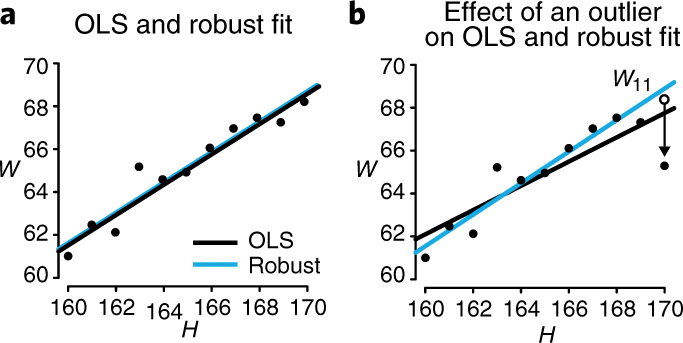

In LLS this can happen for non-Gaussian-distributed data when the likelihood for the points has heavy tails; it can also happen if something went wrong with measuring that particular data point etc. If we do not have a good reason to believe these outliers to be wrong, we should **never** discard them. The usual way to treat outliers in a LLS analysis is to use so-called robust regression methods. These essentially derive model parameters by minimizing functions alternative to $\chi^2$. These functions are chosen such as to minimize the effect of outliers. A popular method is *L1 regression*, where we minimize the L1-norm, i.e. $$\mathrm{L}_1 = \sum_i |y_i-f(x_i, \theta)|,$$ which is less affected by significant outliers.

Another related approach is *M-regression* which minimizes a generic function of the residuals chosen to be more robust to outliers.

## Which model best fits my data? - Cross-validation

Let us assume that we have measured the data points $y_i$ shown below as a function of $x_i$. Our model is that $$y_{i, t} = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 +\cdots + \theta_n x_i^n,$$ but we do not know the degree of the polynomial $n$. The question thus is how we can assess which model fits our data best? In general there are two competing effects when answering this question:

1. The higher the model complexity (i.e. the larger $n$), the better the data will be fit.
2. The better we fit the data, the more we will be starting to also fit the noise (as opposed to only the signal). You can imagine the extreme example of fitting $m$ data points with $m$ parameters. This is called *overfitting*.

So how do we choose the optimal combination for our data set?

There are a number of different approaches, but a very powerful method is so-called *cross-validation*, which we will now illustrate on our example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '$y$')

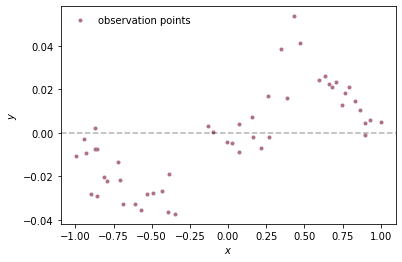

In [26]:
x, y = np.loadtxt('data/basisSets.txt').T

x = x[:50]
y = y[:50]

plt.plot(x,y,'.', c='#AE7182', label='observation points')
plt.axhline(0, c='k', linestyle='--', alpha=0.3)
plt.legend(framealpha=0.0,frameon=False)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

In [27]:
def polynom_fit(xi, yi, deg):
    """
    Fits a linear polynomial to the data points xi, yi.
    Args:
    xi (:obj:`integer`, `float` or `array`): x coordinates of points to fit
    yi (:obj:`integer`, `float` or `array`): y coordinates of points to fit
    deg (:obj:`integer` or `float`): degree of polynomial
    
    Returns:
        res (:obj:`integer`, `float` or `array`): best fit coefficients
        X (:obj:`integer`, `float` or `array`): least squares coefficient matrix
    """

    X = np.zeros((xi.shape[0], deg+1))
    for i in range(deg+1):
        X[:, i] = xi**i
    res = np.linalg.lstsq(X, yi, rcond=None)
    
    return res[0], X

Compute the best-fitting model for polynomial degrees up to $d=13$:

In [20]:
res = []
X = []
fit = []

for deg in range(1, 14):
    res_temp, X_temp = polynom_fit(x, y, deg)
    fit_temp = np.dot(X_temp, res_temp)
    res.append(res_temp)
    X.append(X_temp)
    fit.append(fit_temp)

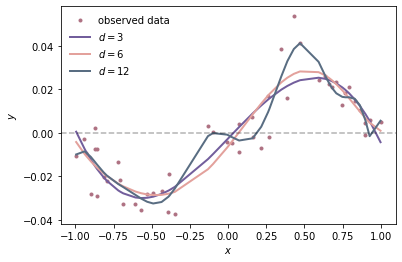

In [21]:
sorted_ind = np.argsort(x)

plt.plot(x, y, '.', c='#AE7182', label='observed data')
plt.plot(x[sorted_ind], fit[2][sorted_ind], color='#725e9c', label=r'$d={}$'.format(3), linewidth=2)
plt.plot(x[sorted_ind], fit[5][sorted_ind], color='#e3a19c', label=r'$d={}$'.format(6), linewidth=2)
plt.plot(x[sorted_ind], fit[11][sorted_ind], color='#596d82', label=r'$d={}$'.format(12), linewidth=2)
plt.axhline(0, c='k', linestyle='--', alpha=0.3)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(frameon=False, loc='upper left')

The basic idea of cross-validation is that a model that overfits the data will perform very well on the data it has been trained on but will generalize very poorly to unseen data. Therefore, what we do in cross-validation is to split the data we are trying to fit into three parts: *training*, *validation*, and *test* data. We then fit our model using the training data, and evaluate its performance using the *validation*, and *test* data sets. This essentially allows us to test how well our model generalizes.

A popular algorithm is $k$-fold cross-validation. Let us assume our data consists of $n$ pairs $(x_i, y_i)_{i=1}^n$. We then subdivide our data into $k$ subsamples of length $n_k$, and compute the best-fitting model parameters for the data leaving out this subset. We can then evaluate the performance of the model both on the data we have used to fit, and the data that we did not use. 

The general algorithm is as follows: For each $i\leq k$:

1. Determine the best-fit model parameters from the data leaving out the $i$-th subsample.

2. Compute the cross-validation error on the held-out sample.

Finally compute the averaged cross-validation error as $$\mathrm{MSE}_{\mathrm{CV}}=\frac{1}{k}\sum_{i=1}^k\frac{1}{n_k}\sum_{j=1}^{n_k}(\hat{y}_{j, -i}-y_j)^2,$$ where $\hat{y}_{j, -i}$ denotes the model prediction for data point $j$ when the $i$-th sample has been left out of the fitting. In analogy, we can compute the averaged training set error through $$\mathrm{MSE}_{\mathrm{tr}}=\frac{1}{k}\sum_{i=1}^k\frac{1}{n_t}\sum_{j=1}^{n_t}(\hat{y}_{j}-y_j)^2.$$

While a more complex model will perform well on the training set, i.e. lead to a small $\mathrm{MSE}_{\mathrm{tr}}$, we expect it to perform increasingly poorly on the cross-validation set, i.e. lead to a large $\mathrm{MSE}_{\mathrm{CV}}$. We can then pick the optimal model from a tradeoff between minimizing the prediction errors for the training set and maximizing generalizability. 

Note that here we did not consider test data for simplicity. Test data is however an essential part of cross-validation as we use the CV set to pick the complexity of a model. So to obtain an unbiased estimate of the model performance, we need to evaluate it on the test set in the end.

In [22]:
def polynom_expansion(xi, coeffs, deg):
    """
    Determines the polynomial fit to xi.
    Args:
    xi (:obj:`integer`, `float` or `array`): x coordinates of points to fit
    coeffs (:obj:`integer`, `float` or `array`): polynomial coefficients
    deg (:obj:`integer` or `float`): degree of polynomial
    
    Returns:
        exp (:obj:`integer`, `float` or `array`): value of polynomial at xi
    """
    
    exp = 0.
    for i in range(deg+1):
        exp += coeffs[i]*xi**i
    
    return exp

In [23]:
nfolds = 10
lenfolds = x.shape[0]//nfolds
maxdeg = 10

err_training = np.zeros(maxdeg+1)
err_cv = np.zeros(maxdeg+1)
for deg in range(maxdeg+1):
    err_cv_i = np.zeros(nfolds)
    err_tr_i = np.zeros(nfolds)
    for i in range(nfolds):
        mask = np.ones_like(x, dtype=bool)
        mask[lenfolds*i:lenfolds*(i+1)] = 0
        xsample = x[mask]
        ysample = y[mask]
        res, X = polynom_fit(xsample, ysample, deg)
        fit_cv = polynom_expansion(x[~mask], res, deg)
        err_cv_i[i] = np.sum((fit_cv-y[~mask])**2)/fit_cv.shape[0]
        fit_tr = polynom_expansion(x[mask], res, deg)
        err_tr_i[i] = np.sum((fit_tr-y[mask])**2)/fit_tr.shape[0]
    err_training[deg] = np.mean(err_tr_i)
    err_cv[deg] = np.mean(err_cv_i)

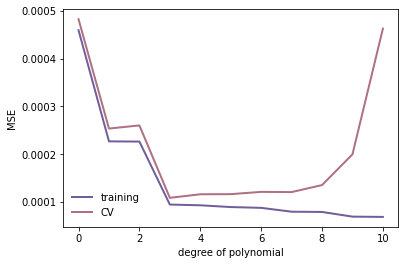

In [24]:
plt.plot(np.arange(maxdeg+1), err_training, color='#725e9c', linewidth=2, label='training')
plt.plot(np.arange(maxdeg+1), err_cv, color='#AE7182', linewidth=2, label='CV')
plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.legend(frameon=False)

This shows that around polynomial degree of $d\simeq 8$, $\mathrm{MSE}_{\mathrm{CV}}$ starts to increase while $\mathrm{MSE}_{\mathrm{tr}}$ continues to decrease as we increase model complexity. This shows that for higher than approximately 8th degree polynomials, we start fitting the noise features in the particular data sets which causes the fit to perform increasingly poorly on unseen data. From this we can thus conclude that an optimal choice for a fitting polynomial is around $d=6$.  